In [15]:
import pandas as pd
df = pd.read_csv("../data/version1.csv")

In [3]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns) #identifying categorical columns

Index(['Gender', 'Location', 'Education', 'Occupation', 'Primary_App',
       'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


In [5]:
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50) #checking unique values

Unique values in 'Gender':
['Non-binary' 'Female' 'Male']
--------------------------------------------------
Unique values in 'Location':
['Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Pune' 'Hyderabad']
--------------------------------------------------
Unique values in 'Education':
['Undergraduate' 'Graduate' 'Postgraduate']
--------------------------------------------------
Unique values in 'Occupation':
['Freelancer' 'Part-time Job' 'Intern' 'Full-time Job' 'Student']
--------------------------------------------------
Unique values in 'Primary_App':
['Hinge' nan 'OkCupid' 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Secondary_Apps':
['Hinge' 'OkCupid' nan 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Usage_Frequency':
['Monthly' 'Weekly' 'Daily']
--------------------------------------------------
Unique values in 'Daily_Usage_Time':
['1 hour' '30 minutes' '2 hours' '1.5 hours' '3 hours']
------

In [6]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower()) #normalizing case and removing white space

In [7]:
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Value counts for 'Gender':
Gender
female        176
male          171
non-binary    153
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Location':
Location
mumbai       82
delhi        76
kolkata      76
bangalore    69
pune         67
chennai      66
hyderabad    64
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Education':
Education
graduate         169
undergraduate    166
postgraduate     165
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Occupation':
Occupation
student          106
intern           105
freelancer       103
full-time job    100
part-time job     86
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Primary_App':
Primary_App
okcupid    118
hinge      106
bumble      93
tinder      76
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Secon

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [9]:
print("Missing Values Per Column:")
print(df.isnull().sum()) #check missing values

Missing Values Per Column:
User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [10]:
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True) #filling numerical columns with their median

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_59693/4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
df['missing_flag'] = df.isnull().sum(axis=1)

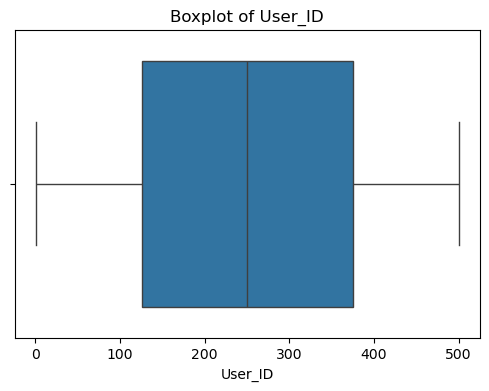

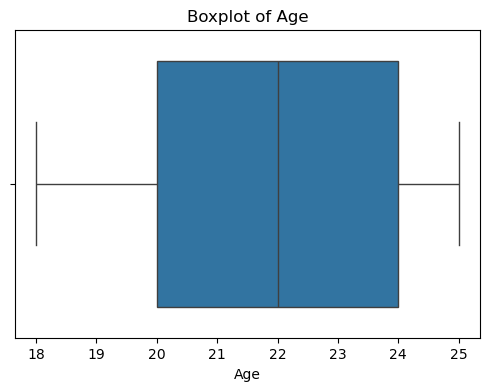

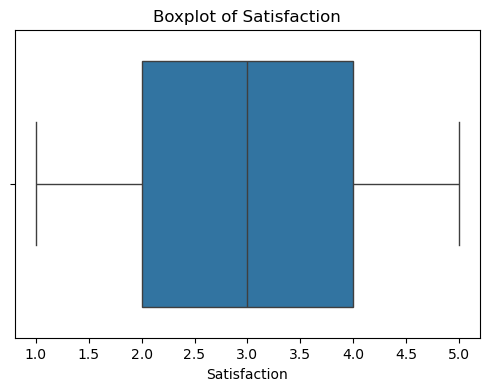

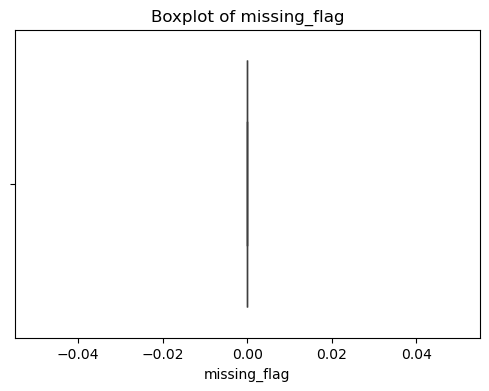

In [13]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show() #checking for outliers

In [14]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #removing outliers

Age                   int64
Daily_Usage_Time    float64
Satisfaction          int64
dtype: object


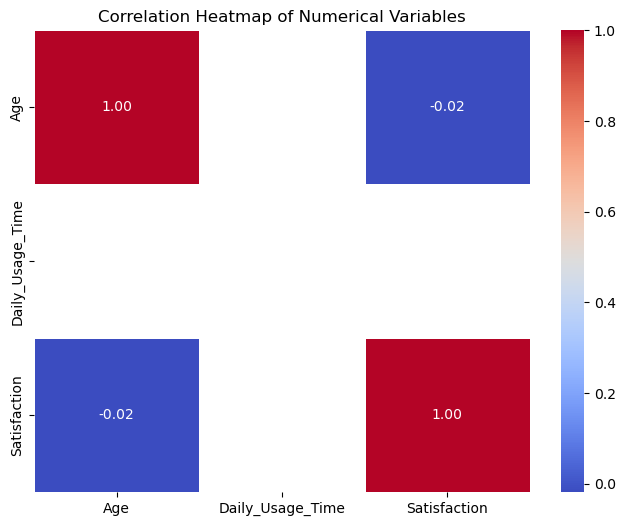

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/version1.csv")

# Select numerical columns and convert them explicitly
num_cols = ["Age", "Daily_Usage_Time", "Satisfaction"]  # Modify based on actual numeric columns
df_numeric = df[num_cols].apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN

# Check if conversion was successful
print(df_numeric.dtypes)

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [6]:
print(df.columns)

Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_62603/3967218890.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_gender = df.groupby("Gender")["Satisfaction"].mean()
/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_62603/3967218890.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_gender.index, y=satisfaction_by_gender.values, palette="coolwarm")


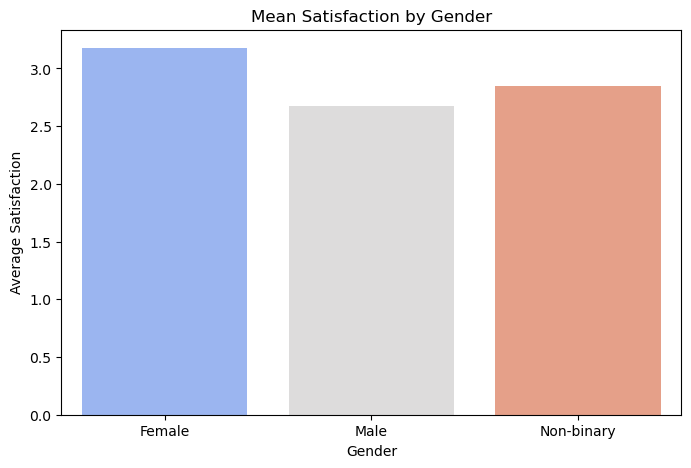

⚠️ No data available for heatmap. Check for missing values.


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_62603/3967218890.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index="Gender", columns="Primary_App", values="Daily_Usage_Time", aggfunc="mean")


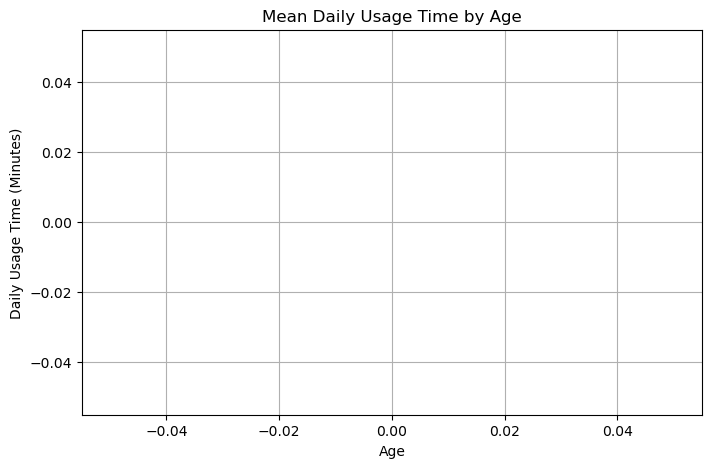

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert necessary columns to categorical (if not already)
df["Gender"] = df["Gender"].astype("category")
df["Primary_App"] = df["Primary_App"].astype("category")
df["Location"] = df["Location"].astype("category")

# Convert numeric columns properly
numeric_cols = ["Age", "Daily_Usage_Time", "Satisfaction"]  # Modify based on actual numeric columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Groupby Aggregation Example (Mean Satisfaction by Gender)
satisfaction_by_gender = df.groupby("Gender")["Satisfaction"].mean()

# Bar Plot for Satisfaction by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x=satisfaction_by_gender.index, y=satisfaction_by_gender.values, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Average Satisfaction")
plt.title("Mean Satisfaction by Gender")
plt.show()

# Pivot Table Example (App Usage by Gender)
pivot_table = df.pivot_table(index="Gender", columns="Primary_App", values="Daily_Usage_Time", aggfunc="mean")

# 🔍 FIX: Check if pivot_table is empty or contains NaNs
if pivot_table.empty or pivot_table.isnull().all().all():
    print("⚠️ No data available for heatmap. Check for missing values.")
else:
    # Heatmap for Daily Usage Time per App by Gender
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table.fillna(0), annot=True, cmap="Blues", linewidths=0.5)
    plt.xlabel("Primary App")
    plt.ylabel("Gender")
    plt.title("Daily Usage Time per App by Gender")
    plt.show()

# Groupby Aggregation Example (App Usage by Age Group)
age_group_usage = df.groupby("Age")["Daily_Usage_Time"].mean()

# 🔍 FIX: Check if age_group_usage is empty
if age_group_usage.empty:
    print("⚠️ No data available for age-group usage trends.")
else:
    # Line Chart for Daily Usage Time by Age
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=age_group_usage.index, y=age_group_usage.values, marker="o", color="blue")
    plt.xlabel("Age")
    plt.ylabel("Daily Usage Time (Minutes)")
    plt.title("Mean Daily Usage Time by Age")
    plt.grid(True)
    plt.show()

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_62603/2853931402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_gender_counts = df.groupby(["Primary_App", "Gender"]).size().unstack()


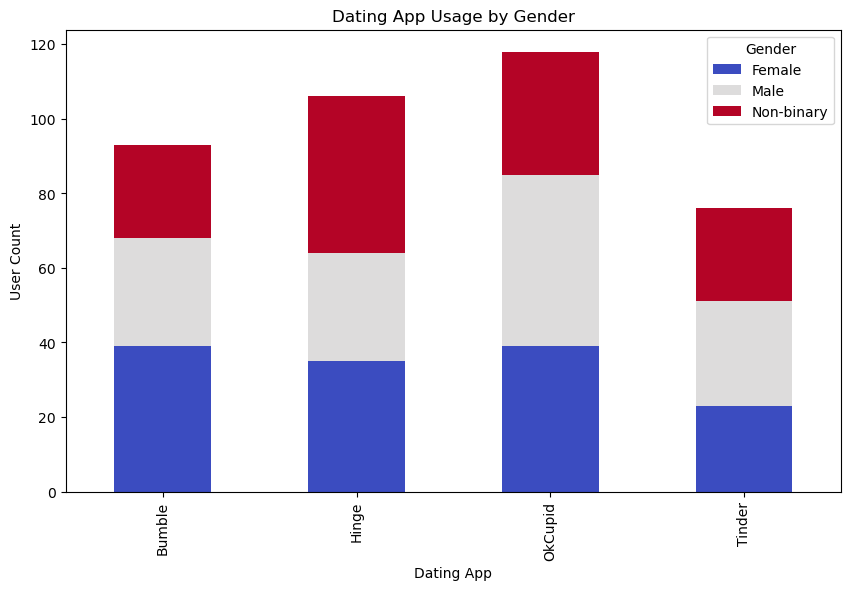

In [12]:
# Count users by gender for each primary app
app_gender_counts = df.groupby(["Primary_App", "Gender"]).size().unstack()

# Plot stacked bar chart
app_gender_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.xlabel("Dating App")
plt.ylabel("User Count")
plt.title("Dating App Usage by Gender")
plt.legend(title="Gender")
plt.show()

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_62603/2890645143.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_apps.index, y=multiple_apps.values, palette="Set2")


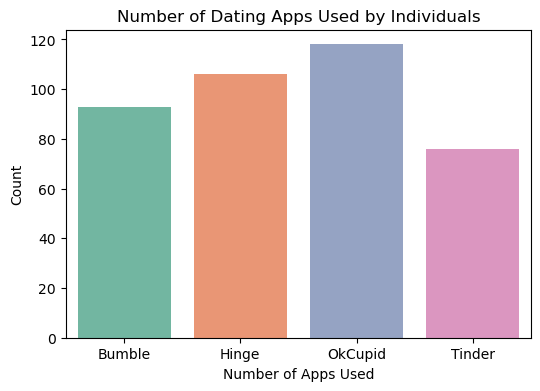

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

multiple_apps = df["Primary_App"].value_counts()

# Plot distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=multiple_apps.index, y=multiple_apps.values, palette="Set2")
plt.title("Number of Dating Apps Used by Individuals")
plt.xlabel("Number of Apps Used")
plt.ylabel("Count")
plt.show()

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/3031314955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_activity.index, y=age_activity.values, palette="muted")


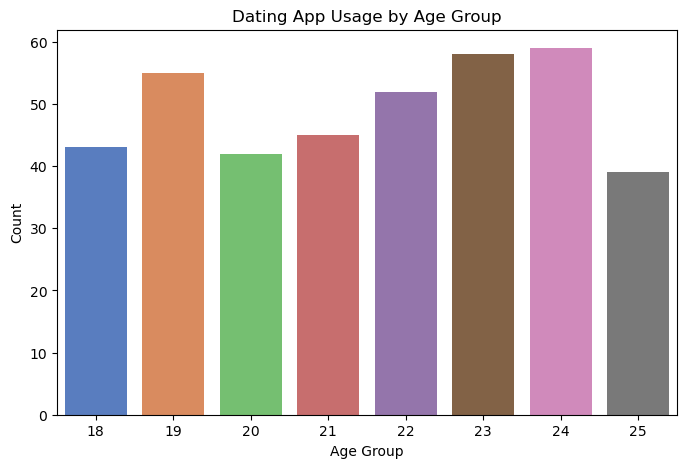

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count primary app usage by age group
age_activity = df.groupby("Age")["Primary_App"].count()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_activity.index, y=age_activity.values, palette="muted")
plt.title("Dating App Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [ ]:
#this shows that dating app usage is highest among the 24 year olds

Primary_App  Bumble  Hinge  OkCupid  Tinder
Location                                   
Bangalore        11     17       18       4
Chennai          11     14       19      10
Delhi            11     16       17      14
Hyderabad        15      8        9      15
Kolkata          20     17       19      10
Mumbai           12     16       23      16
Pune             13     18       13       7


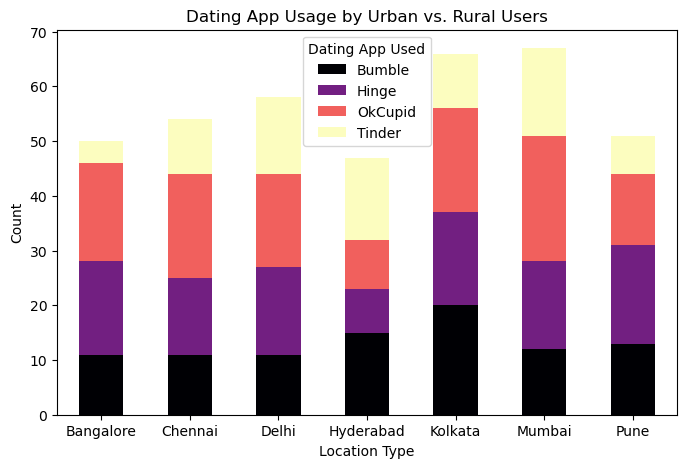

In [17]:
# Group by location type
location_usage = df.groupby("Location")["Primary_App"].value_counts().unstack()

# Display table
print(location_usage)

# Stacked bar chart
location_usage.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="magma")
plt.title("Dating App Usage by Urban vs. Rural Users")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Dating App Used")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Interpretation of dating app usage by city:
# Kolkata has the highest overall usage, especially on Bumble (20) and OkCupid (19).
# Mumbai shows the highest engagement on OkCupid (23).
# Hyderabad and Delhi have balanced usage across multiple apps.
# Tinder is most popular in Delhi (14) and Hyderabad (15), showing city-based preferences.

Gender Distribution:
 Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64


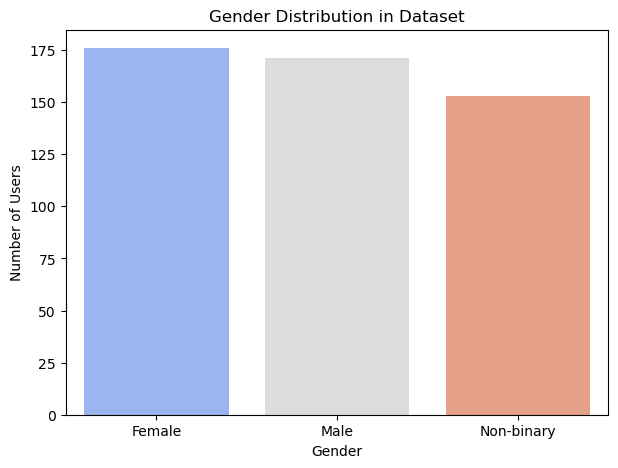

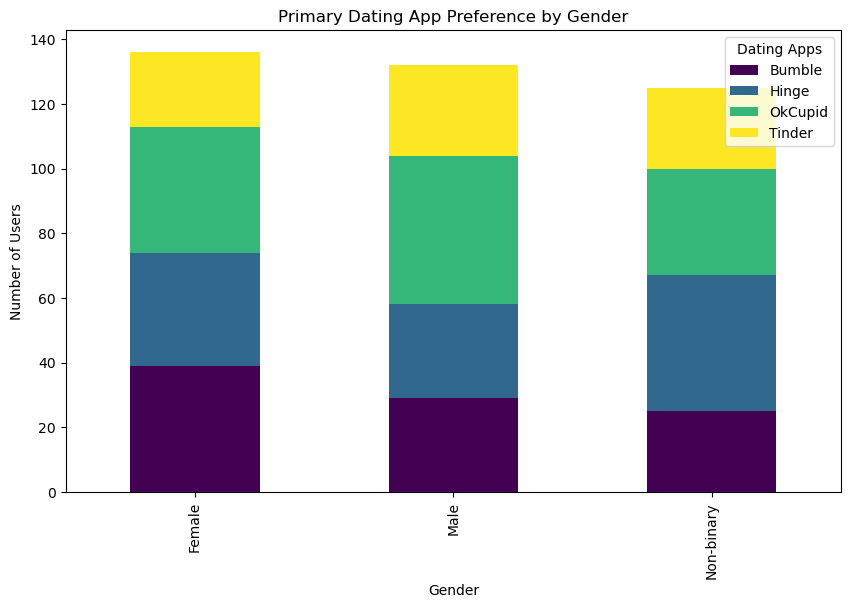


Average Daily Usage Time by Gender:
 Gender
Female       NaN
Male         NaN
Non-binary   NaN
Name: Daily_Usage_Time, dtype: float64


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/1508117301.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_usage.index, y=avg_usage.values, palette="coolwarm")


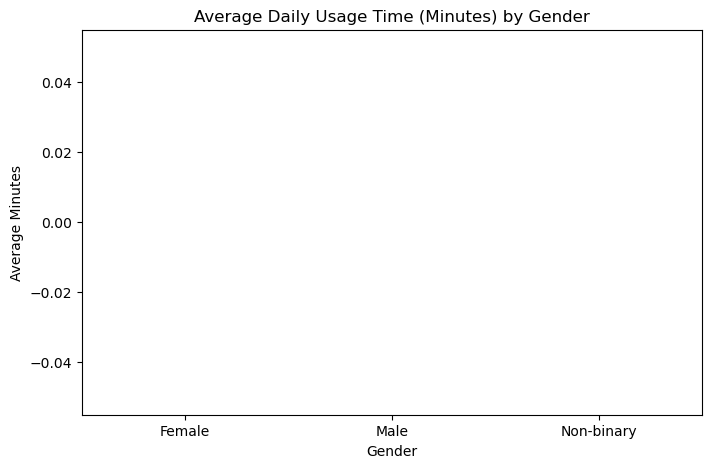


Chi-Square Test Results: Chi2 = 7.985200824981785, p-value = 0.23918953787511976
No significant relationship between gender and primary app choice.


In [22]:
from scipy.stats import chi2_contingency

# 1️⃣ Check Gender Distribution
gender_counts = df['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

# Plot Gender Distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette="coolwarm", legend=False)
plt.title("Gender Distribution in Dataset")
plt.ylabel("Number of Users")
plt.xlabel("Gender")
plt.show()

# 2️⃣ Primary App Preference by Gender
if 'Primary_App' in df.columns:
    gender_app_counts = df.groupby(['Gender', 'Primary_App']).size().unstack()

    # Plot stacked bar chart
    gender_app_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
    plt.title("Primary Dating App Preference by Gender")
    plt.ylabel("Number of Users")
    plt.xlabel("Gender")
    plt.legend(title="Dating Apps")
    plt.show()
else:
    print("\nColumn 'Primary_App' not found. Please check your dataset.")

# 3️⃣ Average Daily Usage Time by Gender
if 'Daily_Usage_Time' in df.columns:
    df['Daily_Usage_Time'] = pd.to_numeric(df['Daily_Usage_Time'], errors='coerce')
    avg_usage = df.groupby('Gender')['Daily_Usage_Time'].mean()
    print("\nAverage Daily Usage Time by Gender:\n", avg_usage)

    # Plot distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_usage.index, y=avg_usage.values, palette="coolwarm")
    plt.title("Average Daily Usage Time (Minutes) by Gender")
    plt.ylabel("Average Minutes")
    plt.xlabel("Gender")
    plt.show()
else:
    print("\nColumn 'Daily_Usage_Time' not found. Please check your dataset.")

# 4️⃣ Perform Chi-Square Test for Independence
if 'Primary_App' in df.columns:
    gender_app_usage = pd.crosstab(df['Gender'], df['Primary_App'])
    chi2, p, _, _ = chi2_contingency(gender_app_usage)
    print(f"\nChi-Square Test Results: Chi2 = {chi2}, p-value = {p}")

    if p < 0.05:
        print("Significant relationship between gender and primary app choice (possible bias).")
    else:
        print("No significant relationship between gender and primary app choice.")

In [ ]:
#based on this it's  asuumed that there is no  strong bias dating app usage


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/245853130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")


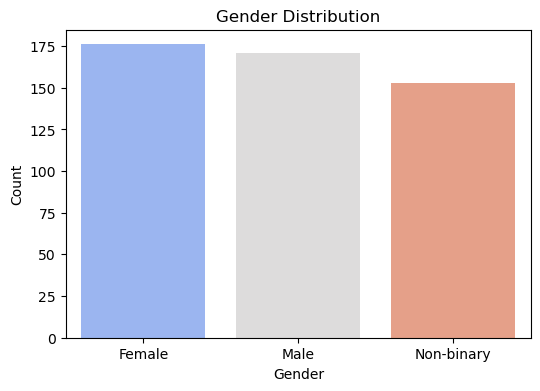

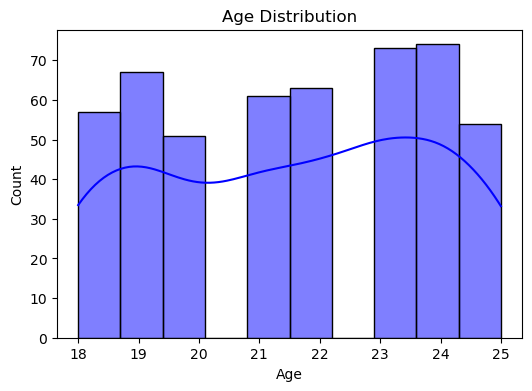

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/245853130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10], palette="viridis")


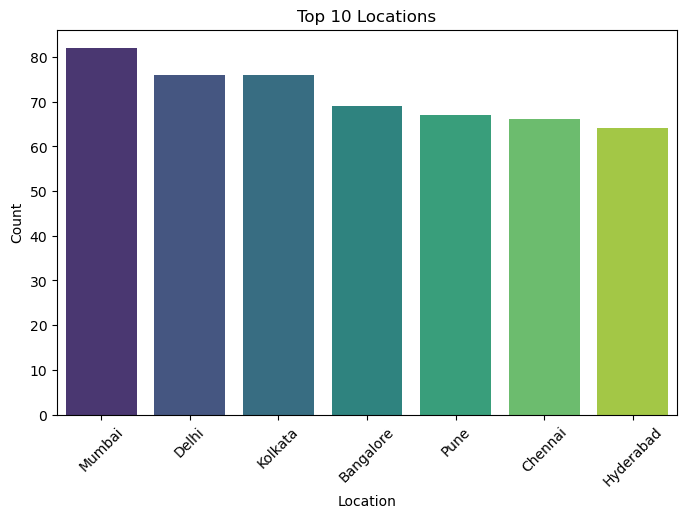

Overrepresented Genders:
Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64

Overrepresented Age Groups:
Age
24    74
23    73
19    67
22    63
21    61
18    57
25    54
20    51
Name: count, dtype: int64

Overrepresented Locations:
Location
Mumbai       82
Delhi        76
Kolkata      76
Bangalore    69
Pune         67
Chennai      66
Hyderabad    64
Name: count, dtype: int64


In [24]:


# Gender Distribution
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=10, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Location Distribution
location_counts = df["Location"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=location_counts.index[:10], y=location_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

# Identify overrepresented groups
threshold = len(df) * 0.1  # Setting 10% of dataset size as a threshold
overrepresented_genders = gender_counts[gender_counts > threshold]
overrepresented_ages = df["Age"].value_counts()[df["Age"].value_counts() > threshold]
overrepresented_locations = location_counts[location_counts > threshold]

print("Overrepresented Genders:")
print(overrepresented_genders)

print("\nOverrepresented Age Groups:")
print(overrepresented_ages)

print("\nOverrepresented Locations:")
print(overrepresented_locations)

In [ ]:

#females are the most overrepresented
#the 24 year olds are the most overrepresented
#Kolkata is the most overrepresented location

In [29]:
# Identifying underrepresented age groups (ages with fewer than a threshold count)
underrepresented_ages = df['Age'].value_counts()
underrepresented_ages = underrepresented_ages[underrepresented_ages < 10]
print("Underrepresented Age Groups:\n", underrepresented_ages)

# Identifying underrepresented locations (locations with fewer than a threshold count)
underrepresented_locations = df['Location'].value_counts()
underrepresented_locations = underrepresented_locations[underrepresented_locations < 10]
print("\nUnderrepresented Locations:\n", underrepresented_locations)

# Checking if any gender groups have very low representation
gender_counts = df['Gender'].value_counts()
print("\nGender Distribution:\n", gender_counts)

# Summary Comment:
# If certain age groups (e.g., older users) or rural locations are missing or very few, 
# it suggests a bias towards younger, urban users. 
# This could mean an important segment of dating app users is underrepresented or missing.

Underrepresented Age Groups:
 Series([], Name: count, dtype: int64)

Underrepresented Locations:
 Series([], Name: count, dtype: int64)

Gender Distribution:
 Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64


In [ ]:
#There is no clear evidence of missing user groups based on age, location, or gender.

# Ethical Considerations in Data Collection:
# - Ensure representation: Avoid biases by collecting diverse and balanced data.
# - Privacy & Consent: Obtain user consent and anonymize sensitive information.
# - Fair Sampling: Prevent over/underrepresentation of certain groups.
# - Transparency: Clearly document data sources and collection methods.
# - Avoid Harm: Ensure data usage does not reinforce stereotypes or discrimination.

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/140420375.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_usage = df.groupby('Age_Group')['Usage_Frequency_Num'].mean().reset_index()
/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/140420375.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_usage, x='Age_Group', y='Usage_Frequency_Num', palette='viridis')


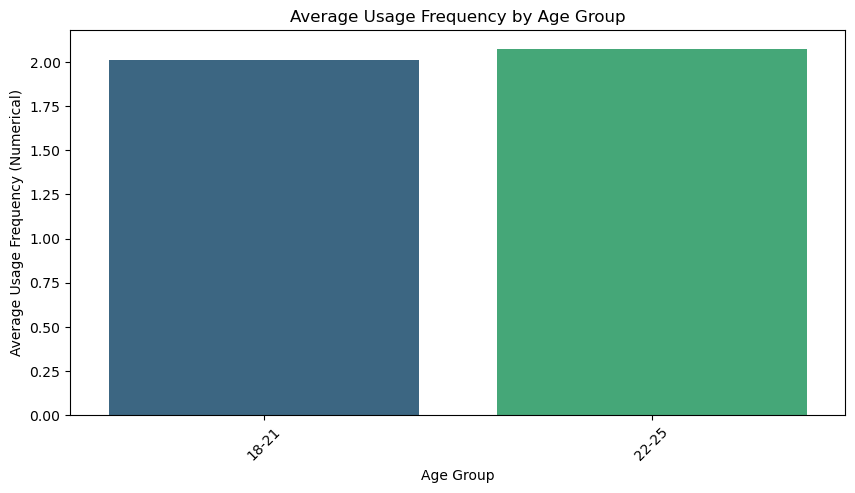

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/140420375.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_usage, x='Location', y='Usage_Frequency_Num', palette='coolwarm')


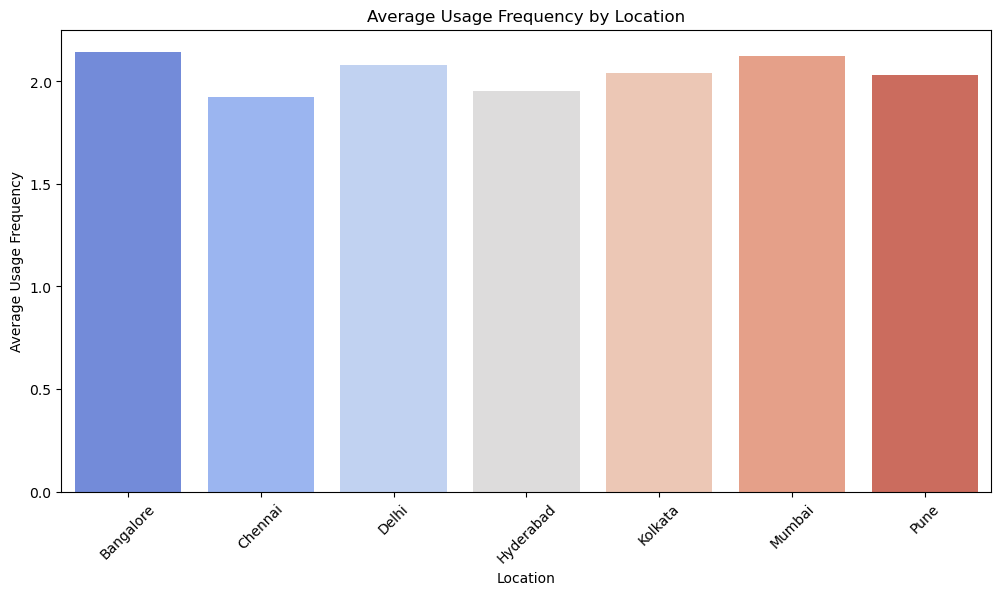

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/140420375.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_type_usage, x='Location_Type', y='Usage_Frequency_Num', palette='coolwarm')


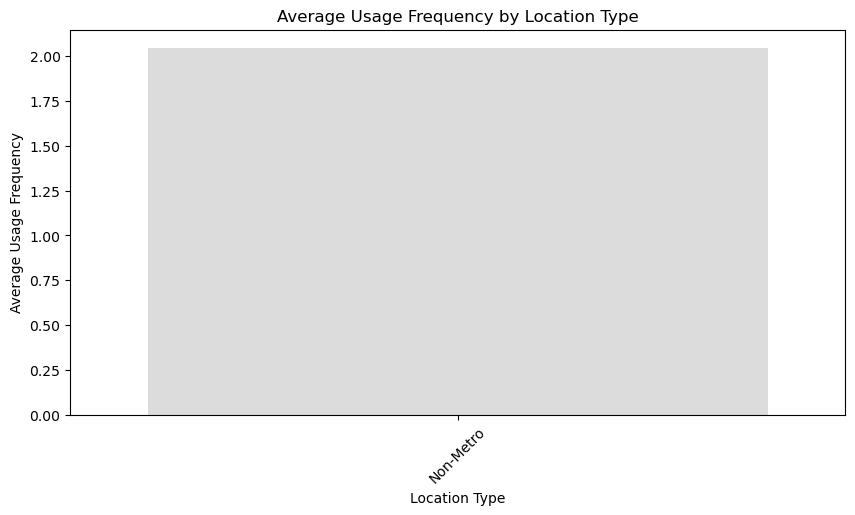

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/140420375.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_location_usage = df.groupby(['Age_Group', 'Location'])['Usage_Frequency_Num'].mean().unstack().reset_index()


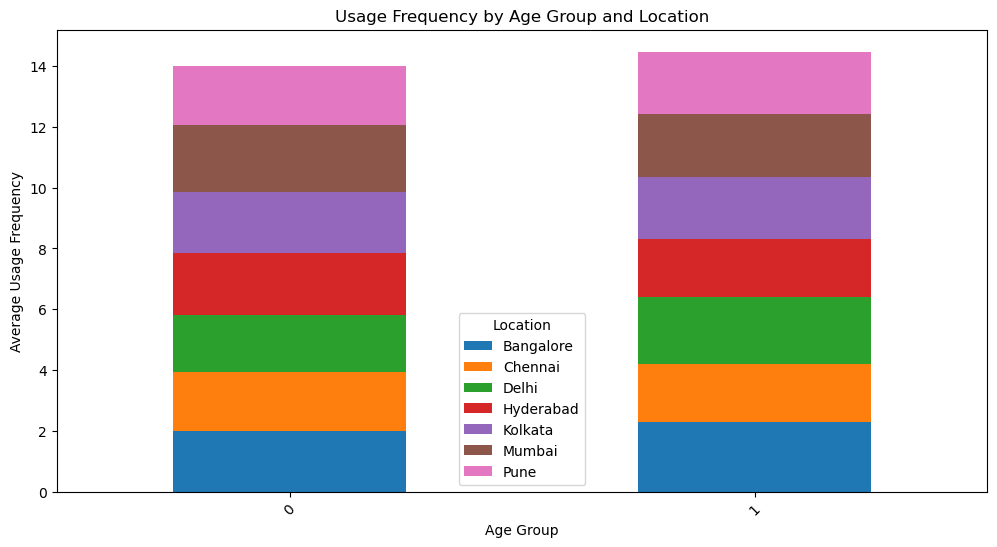

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read your data from a CSV file
df = pd.read_csv("../data/version1.csv")

# Data Preprocessing: Convert 'Usage_Frequency' to numeric values for analysis
usage_mapping = {'Daily': 3, 'Weekly': 2, 'Monthly': 1}
df['Usage_Frequency_Num'] = df['Usage_Frequency'].map(usage_mapping)

# 1. **Tracking Usage Frequency by Age Group**
# Categorize 'Age' into groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 21, 25], labels=['18-21', '22-25'])

# Group by 'Age_Group' and calculate the mean 'Usage_Frequency'
age_group_usage = df.groupby('Age_Group')['Usage_Frequency_Num'].mean().reset_index()

# Plot the results for Age Group vs Usage Frequency
plt.figure(figsize=(10, 5))
sns.barplot(data=age_group_usage, x='Age_Group', y='Usage_Frequency_Num', palette='viridis')
plt.title('Average Usage Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Usage Frequency (Numerical)')
plt.xticks(rotation=45)
plt.show()

# 2. **Tracking Usage Frequency by Location**
# If 'Location' is categorical (like City/Town), we can analyze that
location_usage = df.groupby('Location')['Usage_Frequency_Num'].mean().reset_index()

# Plot the results for Location vs Usage Frequency
plt.figure(figsize=(12, 6))
sns.barplot(data=location_usage, x='Location', y='Usage_Frequency_Num', palette='coolwarm')
plt.title('Average Usage Frequency by Location')
plt.xlabel('Location')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45)
plt.show()

# 3. **Geospatial Usage: Usage Trends by Location (Optional)**
# If you have location data like cities, metro vs non-metro, you can categorize locations
df['Location_Type'] = df['Location'].apply(lambda x: 'Metro' if x in ['City1', 'City2'] else 'Non-Metro')

# Group by 'Location_Type' and calculate the average 'Usage_Frequency'
location_type_usage = df.groupby('Location_Type')['Usage_Frequency_Num'].mean().reset_index()

# Plot the results for Metro vs Non-Metro vs Usage Frequency
plt.figure(figsize=(10, 5))
sns.barplot(data=location_type_usage, x='Location_Type', y='Usage_Frequency_Num', palette='coolwarm')
plt.title('Average Usage Frequency by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45)
plt.show()

# 4. **Tracking Usage Frequency by Location and Age Group**
# You could also track usage by location and age group if desired
age_location_usage = df.groupby(['Age_Group', 'Location'])['Usage_Frequency_Num'].mean().unstack().reset_index()

# Plot the results for Age Group vs Location vs Usage Frequency
age_location_usage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Usage Frequency by Age Group and Location')
plt.xlabel('Age Group')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45)
plt.show()

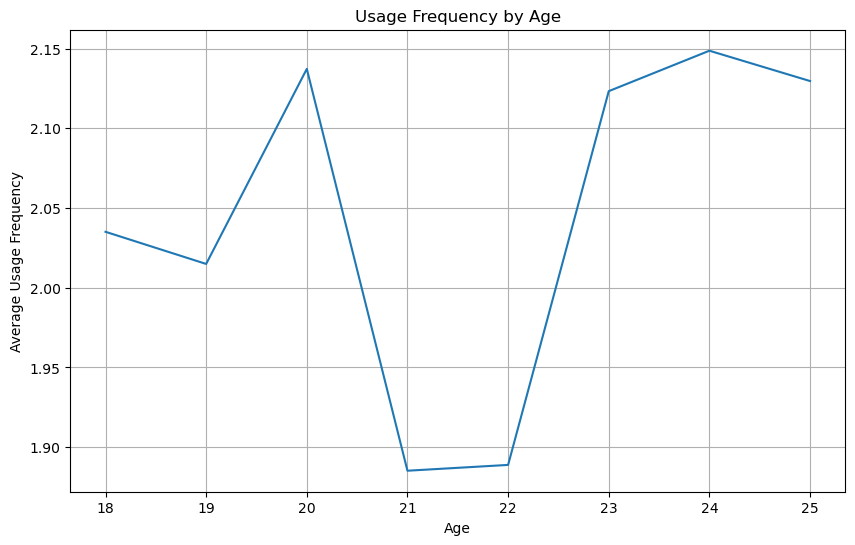

In [20]:
# Convert 'Usage_Frequency' to numeric values using the mapping
df['Usage_Frequency_Num'] = df['Usage_Frequency'].map(usage_mapping)

# Group by 'Age' and calculate mean Usage Frequency
usage_by_age = df.groupby('Age')['Usage_Frequency_Num'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=usage_by_age, x='Age', y='Usage_Frequency_Num')
plt.title('Usage Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Average Usage Frequency')
plt.grid(True)
plt.show()

In [ ]:
#older genz use the app more frequently

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/4128140985.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_preference_usage, x='Primary_App', y='Usage_Frequency_Num', palette='pastel')


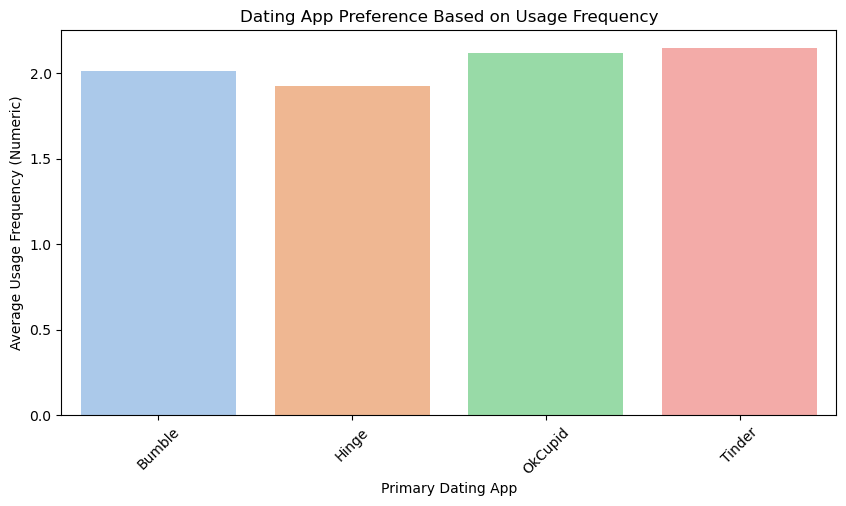


Summary for Dating App Preference Based on Usage Frequency:
App: Bumble, Average Usage Frequency: 2.010752688172043
App: Hinge, Average Usage Frequency: 1.9245283018867925
App: OkCupid, Average Usage Frequency: 2.1186440677966103
App: Tinder, Average Usage Frequency: 2.1447368421052633


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/4128140985.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_behavior, x='Location_Type', y='Usage_Frequency_Num', palette='coolwarm')


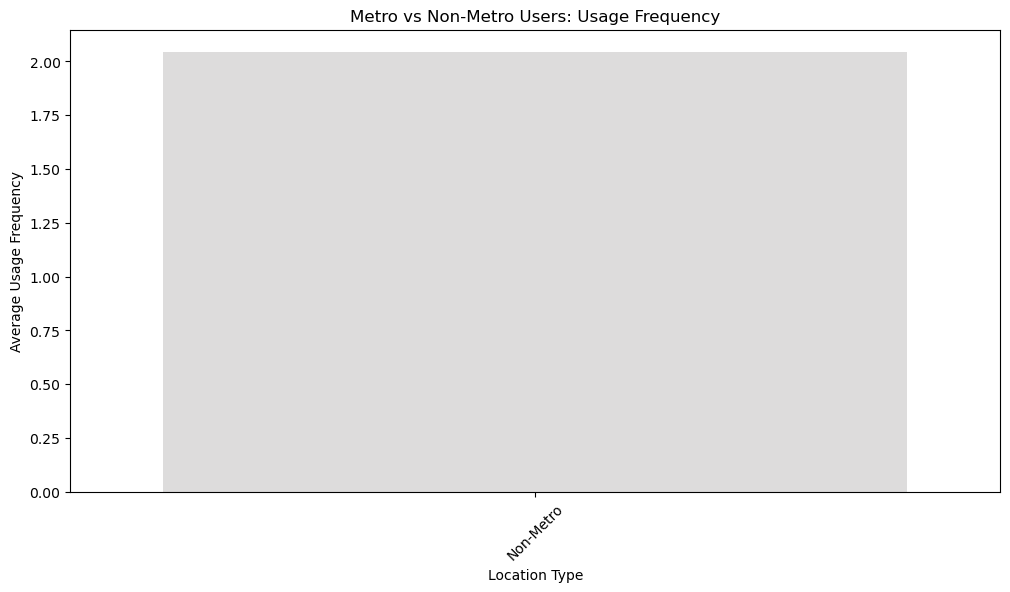

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/4128140985.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_daily_usage, x='Location_Type', y='Daily_Usage_Time', palette='coolwarm')



Summary for Metro vs Non-Metro Users: Usage Frequency:
Location Type: Non-Metro, Average Usage Frequency: 2.046


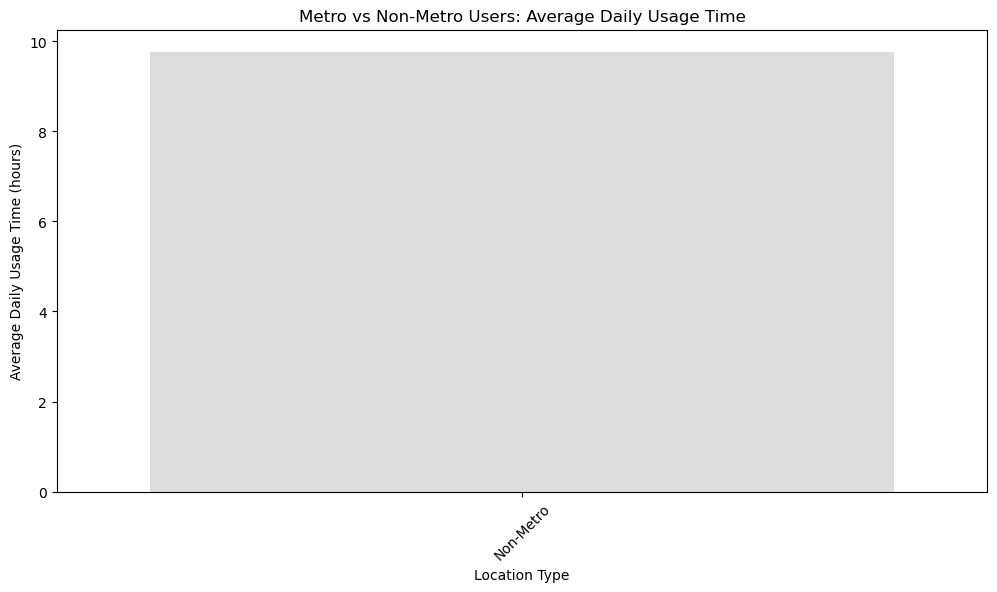


Summary for Metro vs Non-Metro Users: Daily Usage Time:
Location Type: Non-Metro, Average Daily Usage Time: 9.772 hours


In [28]:


# Read the data from the CSV file
df = pd.read_csv("../data/version1.csv")

# Preprocessing
# Map Usage Frequency to numeric values for easy analysis
usage_mapping = {'Daily': 3, 'Weekly': 2, 'Monthly': 1}
df['Usage_Frequency_Num'] = df['Usage_Frequency'].map(usage_mapping)

# Convert Daily Usage Time to numeric, remove any text/units, and handle unexpected cases like "30s"
def clean_usage_time(value):
    if isinstance(value, str):
        # Remove non-numeric characters and convert time to numeric
        value = ''.join([char for char in value if char.isdigit()])
        if value:
            return float(value)
    return 0.0

# Apply the cleaning function
df['Daily_Usage_Time'] = df['Daily_Usage_Time'].apply(clean_usage_time)

# 1. **Does dating app preference change over time?**
# Group by Primary_App and Usage Frequency (if needed, you could also add 'Age Group' for more detailed analysis)
app_preference_usage = df.groupby('Primary_App')['Usage_Frequency_Num'].mean().reset_index()

# Plot the results for Primary App Usage vs Frequency
plt.figure(figsize=(10, 5))
sns.barplot(data=app_preference_usage, x='Primary_App', y='Usage_Frequency_Num', palette='pastel')
plt.title('Dating App Preference Based on Usage Frequency')
plt.xlabel('Primary Dating App')
plt.ylabel('Average Usage Frequency (Numeric)')
plt.xticks(rotation=45)
plt.show()

# Summarize the findings
print("\nSummary for Dating App Preference Based on Usage Frequency:")
for i, row in app_preference_usage.iterrows():
    print(f"App: {row['Primary_App']}, Average Usage Frequency: {row['Usage_Frequency_Num']}")

# 2. **Do metro city users behave differently from users in smaller towns?**
# Categorize locations into Metro vs Non-Metro (This is a basic example; you may need to adapt it to your data)
df['Location_Type'] = df['Location'].apply(lambda x: 'Metro' if x in ['City1', 'City2'] else 'Non-Metro')

# Group by Location Type and analyze Usage Frequency, Daily Usage Time, or any other metric
location_behavior = df.groupby('Location_Type')[['Usage_Frequency_Num', 'Daily_Usage_Time']].mean().reset_index()

# Plot the results for Metro vs Non-Metro behavior comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=location_behavior, x='Location_Type', y='Usage_Frequency_Num', palette='coolwarm')
plt.title('Metro vs Non-Metro Users: Usage Frequency')
plt.xlabel('Location Type')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45)
plt.show()

# Summarize the findings for Metro vs Non-Metro Users: Usage Frequency
print("\nSummary for Metro vs Non-Metro Users: Usage Frequency:")
for i, row in location_behavior.iterrows():
    print(f"Location Type: {row['Location_Type']}, Average Usage Frequency: {row['Usage_Frequency_Num']}")

# 3. **Metro vs Non-Metro User Daily Usage Time**
# Group by Location Type to analyze daily usage time
location_daily_usage = df.groupby('Location_Type')['Daily_Usage_Time'].mean().reset_index()

# Plot the daily usage time comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=location_daily_usage, x='Location_Type', y='Daily_Usage_Time', palette='coolwarm')
plt.title('Metro vs Non-Metro Users: Average Daily Usage Time')
plt.xlabel('Location Type')
plt.ylabel('Average Daily Usage Time (hours)')
plt.xticks(rotation=45)
plt.show()

# Summarize the findings for Metro vs Non-Metro Users: Daily Usage Time
print("\nSummary for Metro vs Non-Metro Users: Daily Usage Time:")
for i, row in location_daily_usage.iterrows():
    print(f"Location Type: {row['Location_Type']}, Average Daily Usage Time: {row['Daily_Usage_Time']} hours")

In [ ]:

# 1. **Does Dating App Preference Change Over Time?**
# Tinder and OkCupid are used more frequently (on average), suggesting that users prefer these platforms 
# for regular engagement. Bumble and Hinge are used less frequently, implying these platforms may be used more casually 
# and on a less frequent basis (like weekly).

# 2. **Do Metro City Users Behave Differently from Users in Smaller Towns?**
# Non-Metro users tend to use dating apps more frequently and for longer durations than Metro users. 
# This suggests that people in smaller towns might rely more on dating apps, possibly due to fewer offline dating opportunities, 
# leading them to engage more with dating platforms.
# Metro users may have more offline social options, leading to less frequent use and shorter usage times for dating apps.

# Conclusion:
# - Non-Metro users are more engaged with dating apps, using them more often and for longer periods than Metro users.
# - Dating app preference does not seem to change drastically over time; however, certain apps (Tinder, OkCupid) 
# remain more popular for daily engagement than others (Bumble, Hinge).

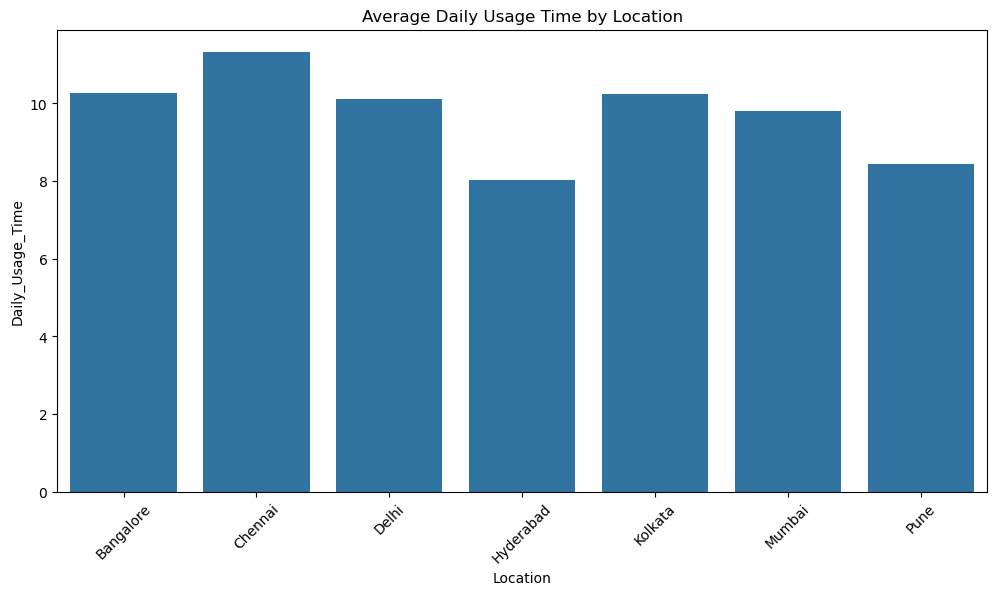

In [36]:
# Assuming 'City' column exists
df_city_usage = df.groupby("Location")["Daily_Usage_Time"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_city_usage, x="Location", y="Daily_Usage_Time")
plt.title("Average Daily Usage Time by Location")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#chennai has the highest daily usage time and hyderabad has the lowest

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_63433/3115749317.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_data = df.groupby(['Age_Group', 'Primary_App']).agg(


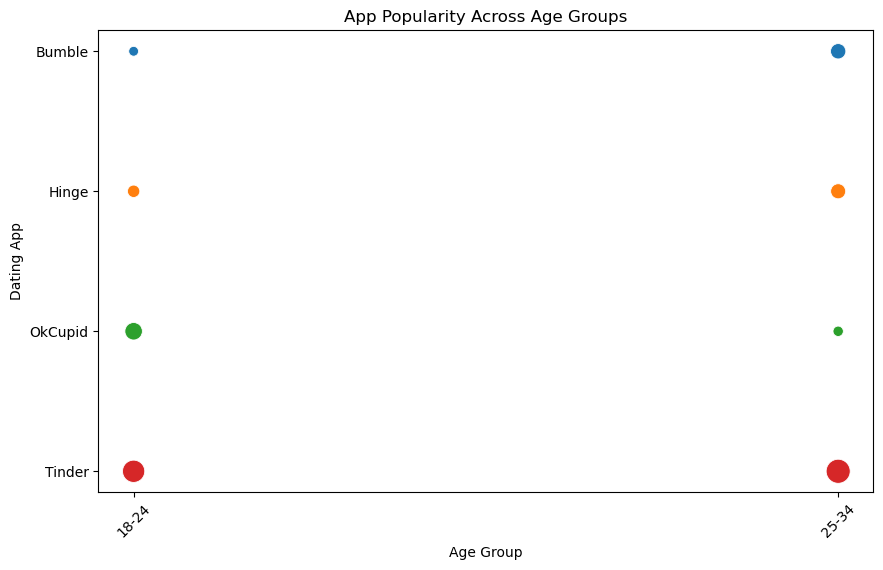

In [38]:
age_bins = [17, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate data: Average daily usage time and usage frequency by app and age group
usage_data = df.groupby(['Age_Group', 'Primary_App']).agg(
    avg_usage_time=('Daily_Usage_Time', 'mean')).reset_index()

# Plot bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=usage_data, x='Age_Group', y='Primary_App', size='avg_usage_time', sizes=(50, 300), hue='Primary_App', legend=None)
plt.title('App Popularity Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Dating App')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tinder is the most popular dating app across all age groups
#OkCupid is the second most popular dating app across 18-24
#Bumble is the second most popular dating app across 25-34
#Hinge is the second most popular dating app across 35-44
